In [2]:
url  = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

In [3]:
from urllib.request import urlretrieve
import pandas as pd

In [4]:
urlretrieve(url,'freemont.csv')

('freemont.csv', <http.client.HTTPMessage at 0x1fc45514588>)

In [5]:
df = pd.read_csv('freemont.csv', index_col='Date', parse_dates=True)
df.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
2012-10-03 00:00:00,4.0,9.0
2012-10-03 01:00:00,4.0,6.0
2012-10-03 02:00:00,1.0,1.0
2012-10-03 03:00:00,2.0,3.0
2012-10-03 04:00:00,6.0,1.0


<IPython.core.display.Javascript object>


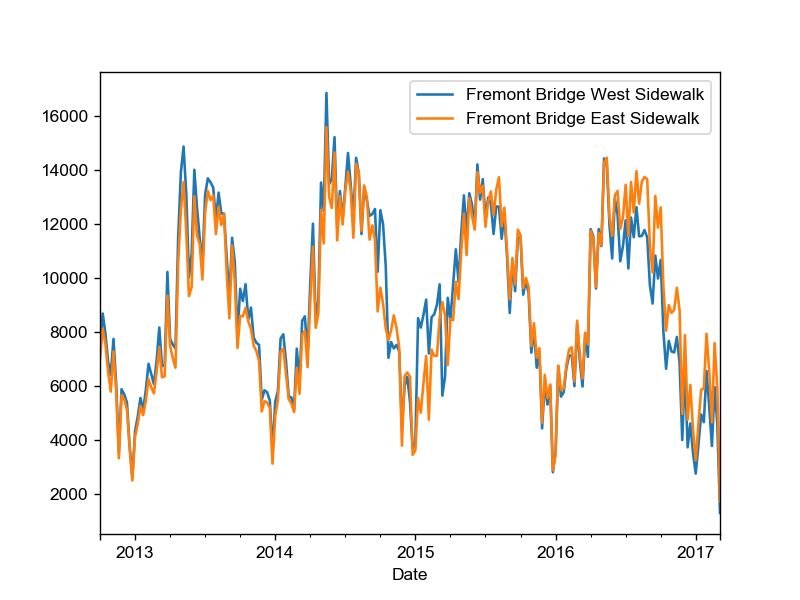

In [6]:
%matplotlib notebook
df.resample('w').sum().plot()

<IPython.core.display.Javascript object>


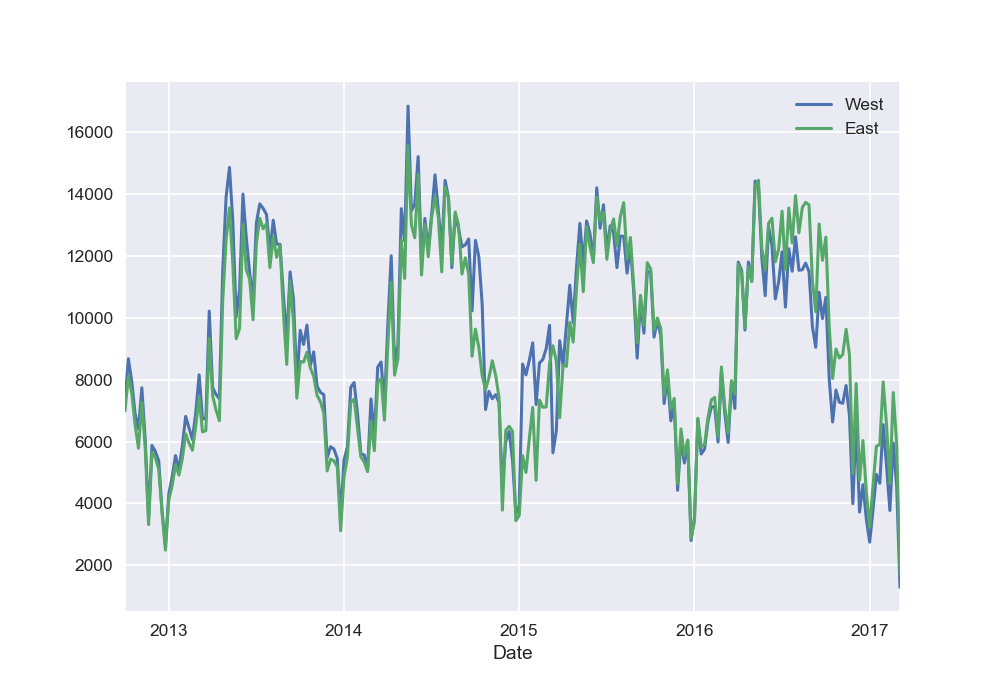

In [7]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.columns= ['West','East']
df.resample('w').sum().plot()

<IPython.core.display.Javascript object>


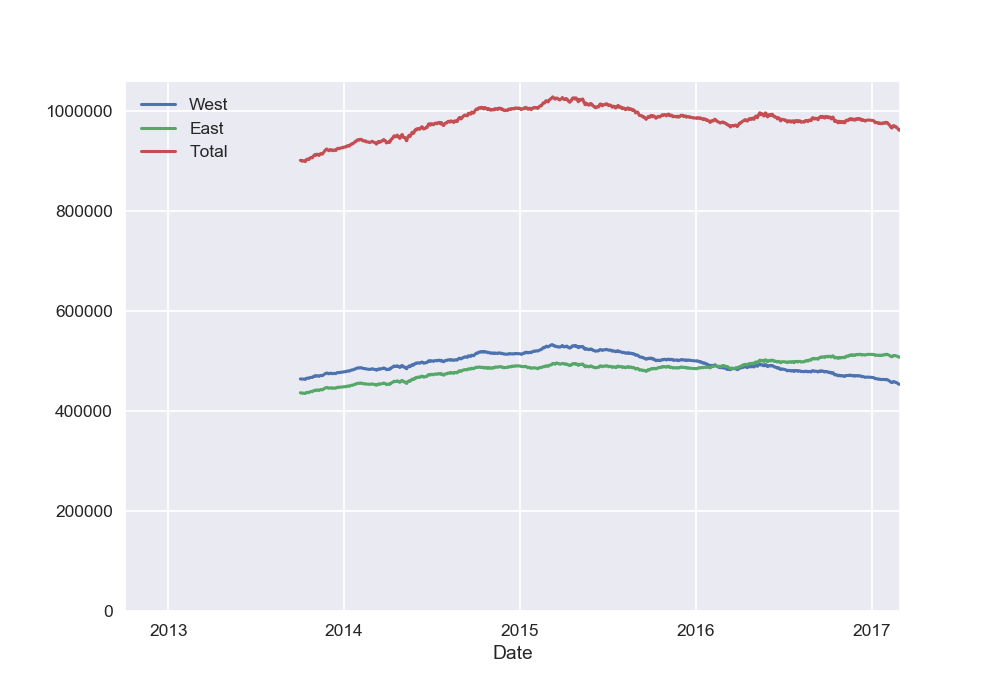

In [8]:
df['Total'] = df['East'] + df['West']
ax = df.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0,None);

<IPython.core.display.Javascript object>


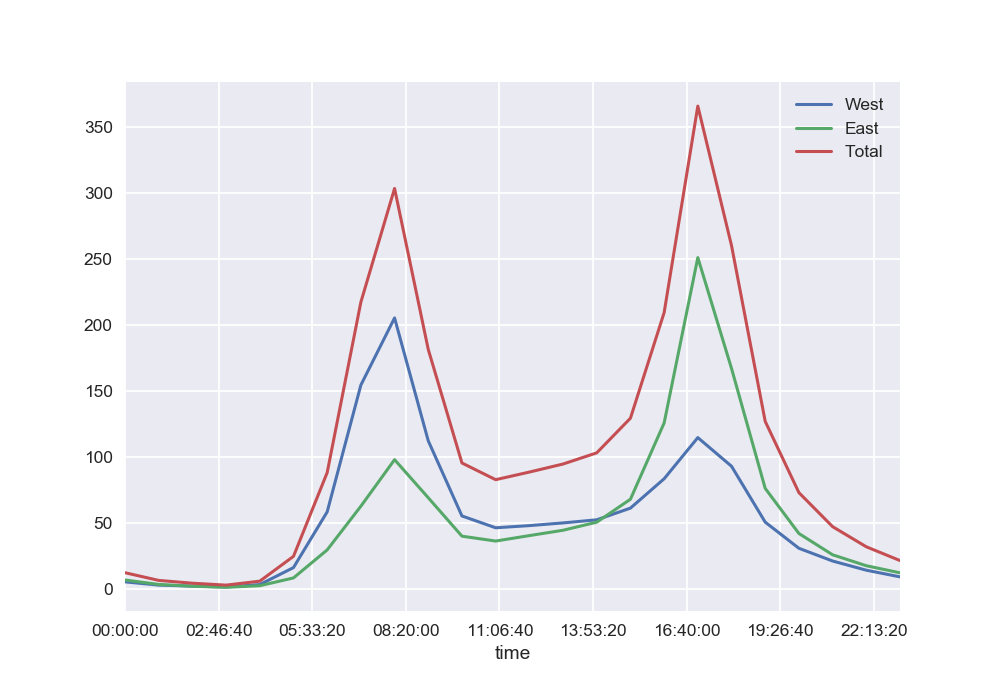

In [9]:
df.groupby(df.index.time).mean().plot()

In [10]:
pivoted = df.pivot_table('Total', index=df.index.time,columns=df.index.date)
pivoted.iloc[:5,:5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


<IPython.core.display.Javascript object>


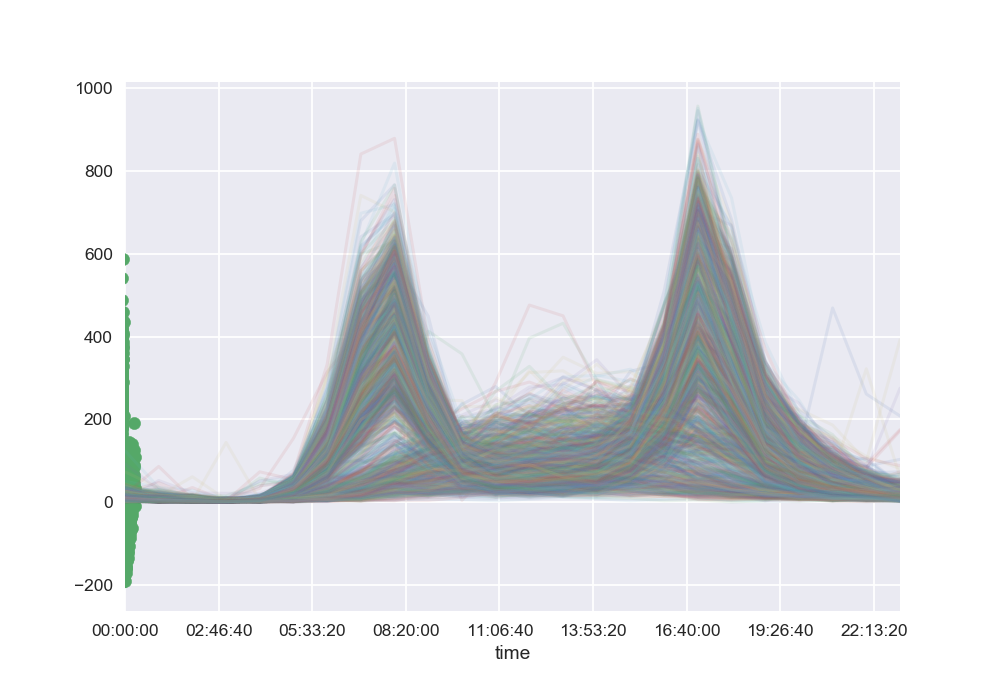

In [11]:
pivoted.plot(legend=False, alpha=0.1)

In [15]:
X = pivoted.fillna(0).T.values
X.shape

(1610, 24)

In [21]:
from sklearn.decomposition import PCA
X2 = PCA(2, svd_solver='full').fit_transform(X)

In [22]:
X2.shape

(1610, 2)

In [25]:
import matplotlib.pyplot as plt
plt.scatter(X2[:,0],X2[:,1])


<IPython.core.display.Javascript object>


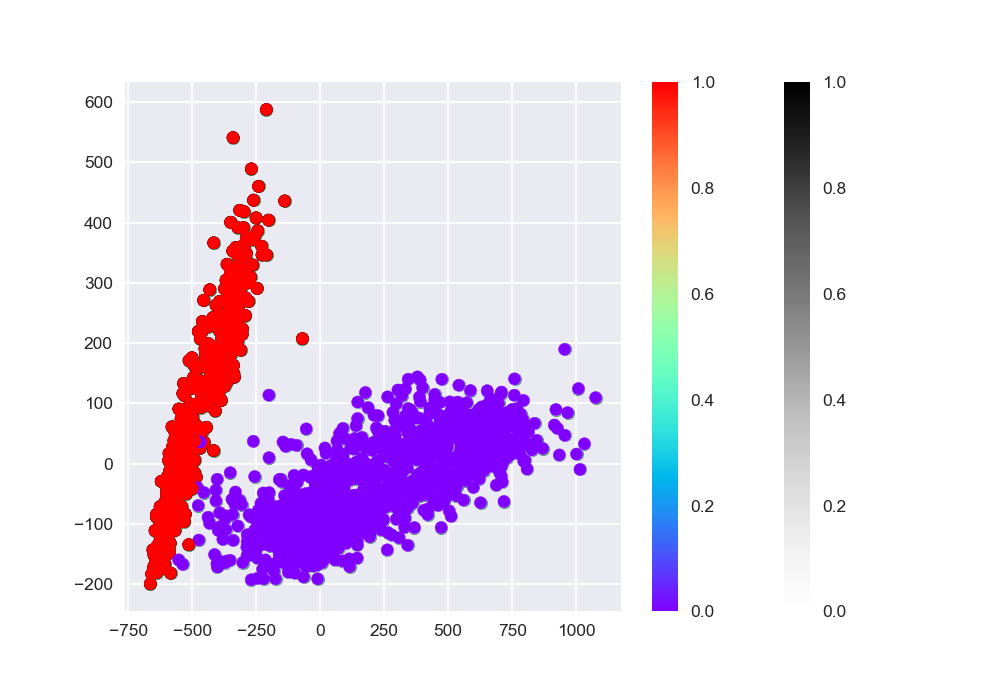

In [27]:
f = plt.figure()
plt.scatter(X2[:,0],X2[:,1])

In [28]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(2)
gmm.fit(X)
labels = gmm.predict(X)
labels

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

<IPython.core.display.Javascript object>


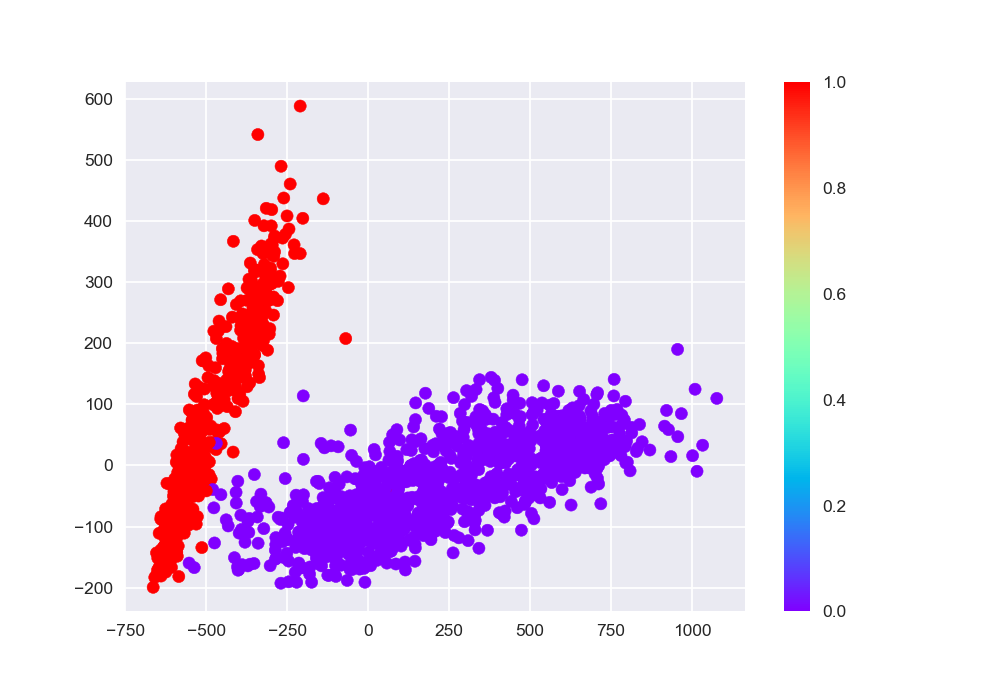

In [33]:
plt.figure()
plt.scatter(X2[:,0],X2[:,1], c=labels,cmap='rainbow')
plt.colorbar()

<IPython.core.display.Javascript object>


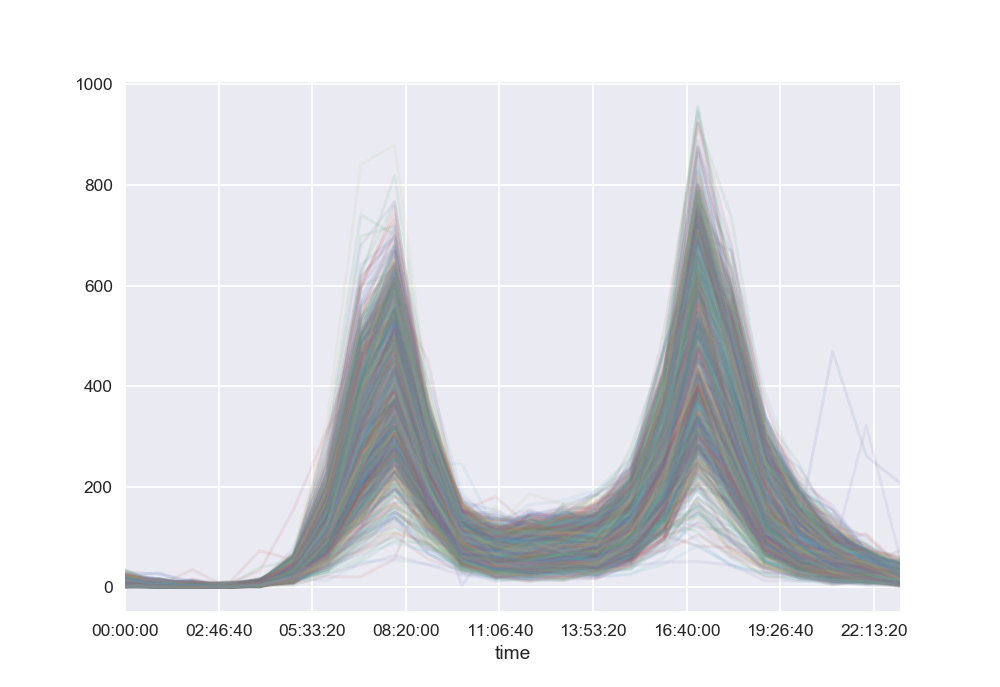

In [37]:
pivoted.T[labels==0].T.plot(legend=False,alpha=0.1)

<IPython.core.display.Javascript object>


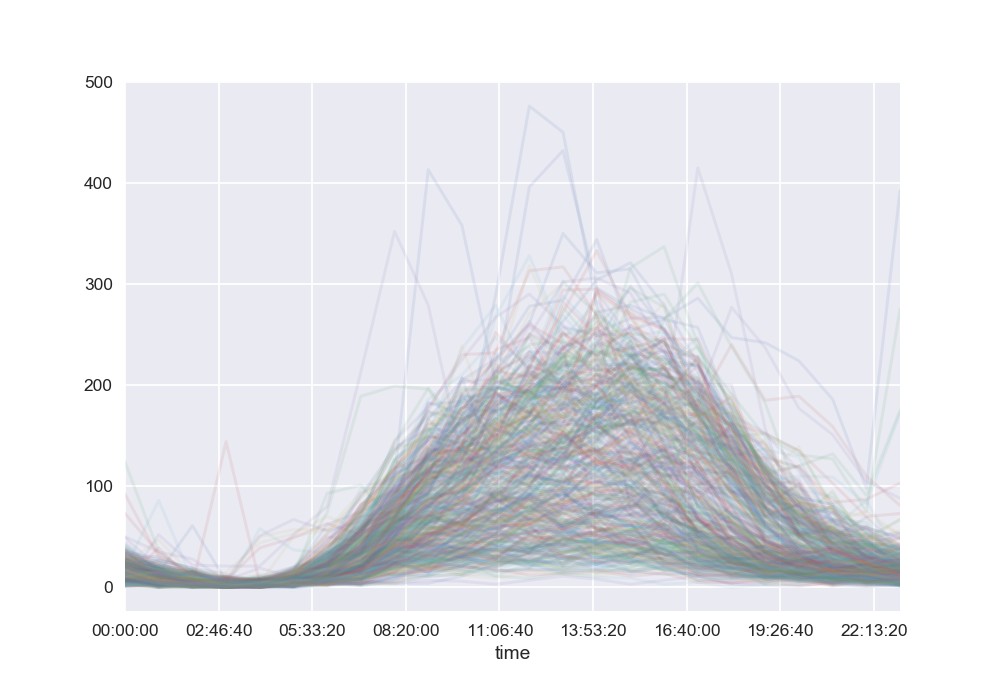

In [39]:
pivoted.T[labels==1].T.plot(legend=False,alpha=0.1)

In [42]:
dayofweek = pd.DatetimeIndex(pivoted.columns).dayofweek

<IPython.core.display.Javascript object>


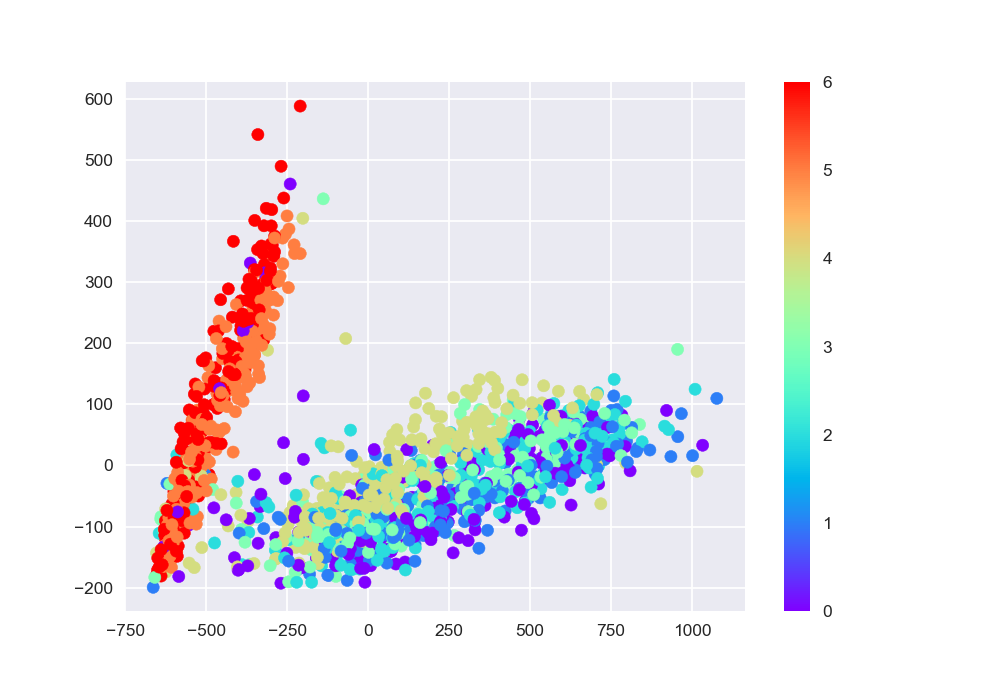

In [44]:
plt.figure()
plt.scatter(X2[:,0],X2[:,1], c=dayofweek,cmap='rainbow')
plt.colorbar()

In [46]:
dates = pd.DatetimeIndex(pivoted.columns)
dates[(labels==1) & (dayofweek <5 )]

DatetimeIndex(['2012-11-22', '2012-11-23', '2012-12-24', '2012-12-25',
               '2013-01-01', '2013-05-27', '2013-07-04', '2013-07-05',
               '2013-09-02', '2013-11-28', '2013-11-29', '2013-12-20',
               '2013-12-24', '2013-12-25', '2014-01-01', '2014-04-23',
               '2014-05-26', '2014-07-04', '2014-09-01', '2014-11-27',
               '2014-11-28', '2014-12-24', '2014-12-25', '2014-12-26',
               '2015-01-01', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-11-26', '2015-11-27', '2015-12-24', '2015-12-25',
               '2016-01-01', '2016-05-30', '2016-07-04', '2016-09-05',
               '2016-11-24', '2016-11-25', '2016-12-26', '2017-01-02',
               '2017-02-06'],
              dtype='datetime64[ns]', freq=None)